# Validación Cruzada
## Métodos de Evaluación de Rendimiento

En los ejercicios anteriores se han dividido los datos en dos partes, un conjunto para entrenamiento y otro para test. El primero es usado para ajustar el modelo y el segundo para evaluarlo y medir su capacidad de generalización.

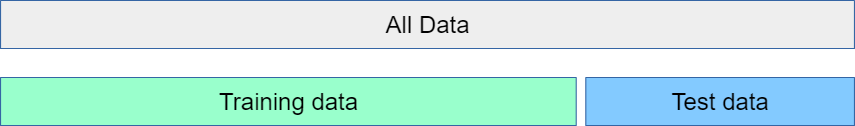

**Validación Cruzada:** El método que se ha venido usando no permite sacar el mayor provecho sobre los datos y obtener el mayor rendimiento del modelo. En la validación cruzada, los datos se dividen repetidamente en entrenamiento y test, obteniendo un modelo para cada par. Los resultados de test se promedian para obtener una estimación más robusta del rendimiento del modelo. La forma más habitual de hacer validación cruzada es la conocida como **k-fold**, la cual consiste en dividir los datos en **k** folds o conjuntos del mismo tamaño (normalmente, $k=5$ o $k=10$). Después, en cada iteración, uno de esos **k** folds se utiliza como test y el resto como datos de entrenamiento.

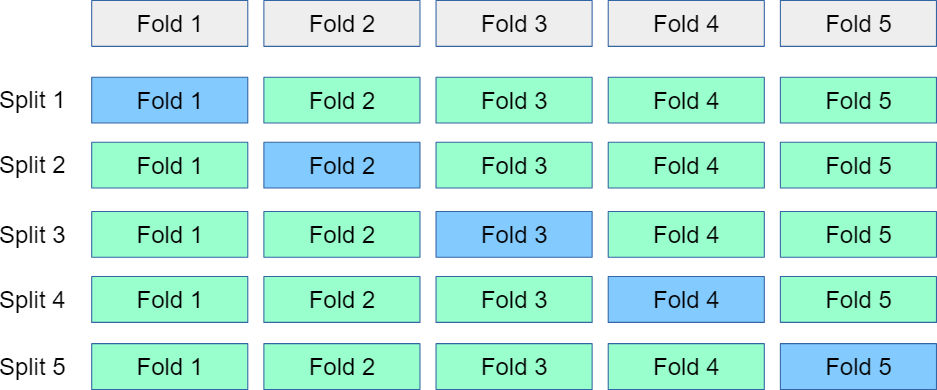

El siguiente ejemplo usa esta técnica para entrenar un clasificador tipo KNieghborsClassifier con el conjunto Iris.

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

clasificador = KNeighborsClassifier()

Las etiquetas de Iris estan ordenadas, lo que quiere decir que si partimos los datos de forma directa, el primero fold solo tendrá etiquetas de la clase 0, mientras que el último solo etiquetas de las clase 2.

In [2]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Para evitar este problema, se debe barajar los datos:

In [3]:
import numpy as np

rng = np.random.RandomState(0)
permutacion = rng.permutation(len(X))

X, y = X[permutacion], y[permutacion]

In [4]:
y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Ahora se hará la validación cruzada usando **k-fold**:

In [5]:
k = 5
n_samples = len(X)
fold_size = n_samples//k

scores = []
masks = []

for fold in range(k):
    # Generar una máscara booleana para los datos de test de este fold
    test_mask = np.zeros(n_samples, dtype=bool)
    test_mask[fold * fold_size : (fold + 1) * fold_size] = True
    # Guardar la máscara para visualizarla después
    masks.append(test_mask)
    # Crear los conjuntos de entrenamiento y test utilizando la máscara
    X_test, y_test = X[test_mask], y[test_mask]
    X_train, y_train = X[~test_mask], y[~test_mask]
    # Ajustar el clasificador
    clasificador.fit(X_train, y_train)
    # Obtener el rendimiento y guardarlo
    scores.append(clasificador.score(X_test, y_test))

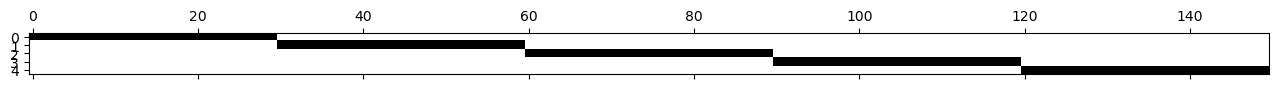

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(masks, cmap='gray_r')

In [7]:
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]
0.96
0.038873012632301994


El rango de variabilidad es bastante grande, desde un 90% de rendimiento a un 100%. Si se hubiéra hecho una sola partición, se hubiéra obtenido cualquiera de estos rendimientos.

Como la validación cruzada es muy común en Machine Learning, hay funciones constuidas que ahorrará todo lo anterior, dando más flexibilidad. El paquete de **scikit-learn.model_selection** contiene todas las funciones relacionadas con validación cruzada. La función más sencilla es **cross_val_score**, la cual recibe un estimador y un dataset.

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clasificador, X, y)
print(scores)
print(np.mean(scores))

[1.         0.93333333 1.         1.         0.93333333]
0.9733333333333334


Por defecto, **k=5**. Este puede ser cambiado con el argumento **cv**.

In [20]:
scores = cross_val_score(clasificador, X, y, cv=10)
print(scores)
print(np.mean(scores))

[1.         1.         0.93333333 0.86666667 1.         1.
 1.         1.         0.93333333 0.93333333]
0.9666666666666666


---

Además, existen objecto que ayudan en el módulo de validación cruzada, los cuales generan los índices para todos los métodos.

In [10]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

Por defecto, **cross_val_score** utiliza **StratifiedKFold** para clasificación, el cual asegura que la proporción de clases se mantenga en cada fold. Si se tiene un dataset de clasificación binaria con un 90% de la clase 0,  significa que en cada fold se tendrá un 90% de esta clase. Si se usará **KFold**, sería bastante probable que algunos de los folds tuviese solo elementos de la clase 0. Por lo general, se suele usar StratifiedKFold para problemas de clasificación.

**StratefiedKFold** también evita tener que barajar los datos, aunque esta opción no esta activa por defecto. 

In [23]:
cv = StratifiedKFold(n_splits=5)

for train, test in cv.split(iris.data, iris.target):
    print(test)

[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
[ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]
[ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]
[ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]
[ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]


Como se observa, se tienen unos datos del principio (primera clase), unos de la mitad (segunda clase) y otros del final (tercera clase), manteniendo así las proporciones entre las clases dentro de cada fold.

In [24]:
def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

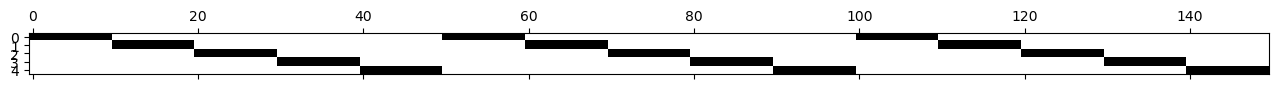

In [13]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

Ahora, si se usará KFold, en donde se ignora la proporción de cada clase:

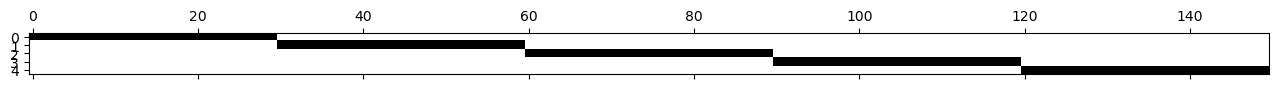

In [25]:
plot_cv(KFold(n_splits=5), iris.data, iris.target)

Al aumentar el número de fold se podrá obtener conjuntos de entrenamiento mas grandes y una evaluación más robusta, pero necesitará más poder de computo o el proceso será más lento.

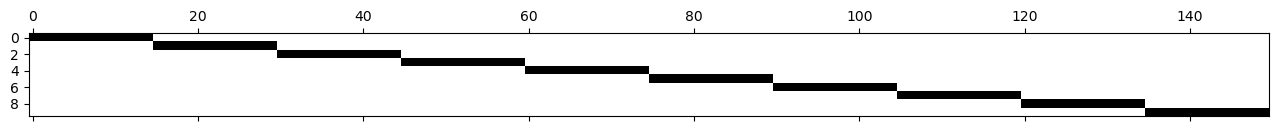

In [26]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

Otro generador de particiones de validación cruzada es **ShuffleSplit**. Este generador parte los datos aleatoriamente varias veces, sin considerar folds. Esto permite al usuario especificar el número de repeticiones y el tamaño del conjunto de entrenamiento de forma independiente.

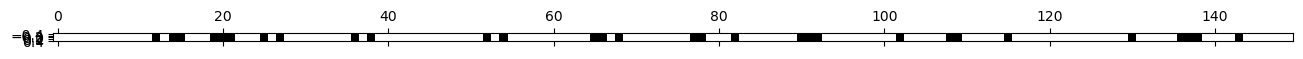

In [46]:
plot_cv(ShuffleSplit(n_splits=1, test_size=.2), iris.data, iris.target)

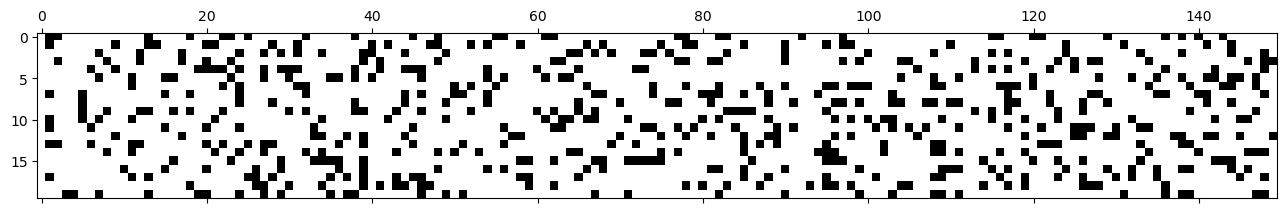

In [34]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)

Cualquiera de estos métodos puede ser implementado con **cross_val_score**.

In [37]:
crossVal = ShuffleSplit(n_splits=10, test_size=.25)
cross_val_score(clasificador, X, y, cv=crossVal)

array([0.97368421, 1.        , 0.97368421, 0.94736842, 1.        ,
       0.97368421, 0.97368421, 0.94736842, 0.92105263, 0.97368421])

<div class="alert alert-info">
    <b>EJERCICIO:</b>
    Realizar una validación cruzada 3-fold utilizando KFold en el dataset Iris, sin barajar.
</div>

In [45]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import os

personas = pd.read_csv(os.path.join('datasets', 'salario.csv'))

bosque = RandomForestClassifier()

bosque.fit(personas[["edad", "estudio"]].values,
          personas["ingreso"].values)

print(bosque.score(personas[["edad", "estudio"]].values,
                  personas["ingreso"].values))

print(cross_val_score(bosque,
                     personas[["edad", "estudio"]].values,
                     personas["ingreso"].values,
                     cv=ShuffleSplit(n_splits=10, test_size=.25)).mean())

0.97
0.768
